Load data and libraries

In [2]:
# Upload the local data file to colab
from google.colab import files
uploaded = files.upload()

Saving data_mutations_short.csv to data_mutations_short.csv


In [3]:
# Installation of necessary libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install geneview
!pip install gprofiler-official
!pip install statsmodels
!pip install scikit-learn
!pip install lifelines
!pip install gseapy
!pip install scikit-learn==1.5.2
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for geneview: filename=geneview-0.2.1-py3-none-any.whl size=54470 sha256=7f0126c46abb8c20fc1522cc45730ea0ffea303a5b034350681d7eefb3b8932c
  Stored in directory: /root/.cache/pip/wheels/91/cb/65/81dafd0254adb97b0938e9c3da9c2c74a8e6169e4595437ca7
Successfully built geneview
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=0adf5299dfe186595d571298382b3bad1788c6781be89e9699a279df1868b00f
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 12.2 MB/s eta 0:00:00


In [4]:
# import libraries to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geneview
from gprofiler import GProfiler
import statsmodels.api as sm
from sklearn import datasets, model_selection, metrics
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read the data in the glioma_mskcc_2019_clinical_data_simpler.csv file into a dataframe

data_mutations_short = pd.read_csv('data_mutations_short.csv', sep=",")
clinical_data = pd.read_csv('lgggbm_tcga_pub_clinical_data_short.csv', sep=",")

In [7]:
# show df
data_mutations_short

,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode
0,AKAP6,Missense_Mutation,TCGA-02-0003
1,ANAPC4,Missense_Mutation,TCGA-02-0003
2,AUTS2,Missense_Mutation,TCGA-02-0003
3,ABTB3,Missense_Mutation,TCGA-02-0003
4,CLEC3B,Silent,TCGA-02-0003
...,...,...,...
30724,FLNC,Frame_Shift_Del,TCGA-WY-A85E
30725,MT-ND5,Silent,TCGA-CS-4943
30726,MT-CO1,Silent,TCGA-DH-5141
30727,MT-CO1,Missense_Mutation,TCGA-CS-4943


In [8]:
# show df
clinical_data

,Patient ID,Sample ID,Absolute Extract Ploidy,Diagnosis Age,ATRX status,BCR Status,BRAF-KIAA1549 fusion,BRAF V600E status,Cancer Type,Cancer Type Detailed,...,Percent aneuploidy,Sex,Study,Telomere length estimate in blood normal (Kb),Telomere length estimate in tumor (Kb),Telomere Maintenance,TERT expression (log2),TERT expression status,TERT promoter status,TMB (nonsynonymous)
0,TCGA-02-0001,TCGA-02-0001-01,3.47,44,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.424900,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TCGA-02-0003,TCGA-02-0003-01,1.96,50,WT,IGC,NaN,WT,Glioma,Diffuse Glioma,...,0.147988,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,1.366667
2,TCGA-02-0004,TCGA-02-0004-01,NaN,59,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.117881,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-02-0006,TCGA-02-0006-01,1.93,56,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.239055,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-02-0007,TCGA-02-0007-01,1.89,40,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,0.257454,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,TCGA-VW-A7QS,TCGA-VW-A7QS-01,1.95,35,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.086236,Female,Brain Lower Grade Glioma,NaN,NaN,NaN,4.754888,Expressed,NaN,0.933333
1043,TCGA-VW-A8FI,TCGA-VW-A8FI-01,NaN,66,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.107533,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,6.643856,Expressed,NaN,1.233333
1044,TCGA-W9-A837,TCGA-W9-A837-01,NaN,47,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.062593,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,3.169925,Expressed,NaN,0.600000
1045,TCGA-WH-A86K,TCGA-WH-A86K-01,NaN,65,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,0.161448,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,0.000000,Not expressed,NaN,0.933333


In [12]:
import pandas as pd

# Load the mutation and clinical data
# data_mutations_short = pd.read_csv('path_to_data_mutations_short.csv')
# clinical_data = pd.read_csv('path_to_lgggbm_tcga_pub_clinical_data_short.csv')

# Step 1: Standardize formatting by stripping whitespace and converting to uppercase
data_mutations_short['Tumor_Sample_Barcode'] = data_mutations_short['Tumor_Sample_Barcode'].str.strip().str.upper()
clinical_data['Sample ID'] = clinical_data['Sample ID'].str.strip().str.upper()
clinical_data['Patient ID'] = clinical_data['Patient ID'].str.strip().str.upper()



In [38]:
clinical_data

,Patient ID,Sample ID,Absolute Extract Ploidy,Diagnosis Age,ATRX status,BCR Status,BRAF-KIAA1549 fusion,BRAF V600E status,Cancer Type,Cancer Type Detailed,...,Sex,Study,Telomere length estimate in blood normal (Kb),Telomere length estimate in tumor (Kb),Telomere Maintenance,TERT expression (log2),TERT expression status,TERT promoter status,TMB (nonsynonymous),Derived_Patient_ID
0,TCGA-02-0001,TCGA-02-0001-01,3.47,44,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-02-0001-01
1,TCGA-02-0003,TCGA-02-0003-01,1.96,50,WT,IGC,NaN,WT,Glioma,Diffuse Glioma,...,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,1.366667,TCGA-02-0003-01
2,TCGA-02-0004,TCGA-02-0004-01,NaN,59,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-02-0004-01
3,TCGA-02-0006,TCGA-02-0006-01,1.93,56,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-02-0006-01
4,TCGA-02-0007,TCGA-02-0007-01,1.89,40,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-02-0007-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,TCGA-VW-A7QS,TCGA-VW-A7QS-01,1.95,35,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,Female,Brain Lower Grade Glioma,NaN,NaN,NaN,4.754888,Expressed,NaN,0.933333,TCGA-VW-A7QS-01
1043,TCGA-VW-A8FI,TCGA-VW-A8FI-01,NaN,66,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,6.643856,Expressed,NaN,1.233333,TCGA-VW-A8FI-01
1044,TCGA-W9-A837,TCGA-W9-A837-01,NaN,47,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,3.169925,Expressed,NaN,0.600000,TCGA-W9-A837-01
1045,TCGA-WH-A86K,TCGA-WH-A86K-01,NaN,65,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,0.000000,Not expressed,NaN,0.933333,TCGA-WH-A86K-01


In [16]:
# Step 1: Perform the merging steps to create the intermediate columns
merged_df = pd.merge(data_mutations_short, clinical_data[['Patient ID', 'Sample ID']],
                     left_on='Tumor_Sample_Barcode', right_on='Sample ID', how='left')

merged_df = pd.merge(merged_df, clinical_data[['Patient ID', 'Sample ID']],
                     left_on='Tumor_Sample_Barcode', right_on='Patient ID', how='left',
                     suffixes=('_from_sample', '_from_patient'))

# Step 2: Place this code here to finalize columns, rename, and calculate row counts

# Save the initial row count before dropping NaN values
initial_row_count = merged_df.shape[0]

# Finalize Patient ID and Sample ID columns based on available matches
merged_df['Patient ID'] = merged_df['Patient ID_from_sample'].combine_first(merged_df['Patient ID_from_patient'])
merged_df['Sample ID'] = merged_df['Sample ID_from_sample'].combine_first(merged_df['Sample ID_from_patient'])

# Drop rows with NaN values in the final Patient ID and Sample ID columns
merged_df = merged_df.dropna(subset=['Patient ID', 'Sample ID'])

# Save the row count after dropping NaN values
final_row_count = merged_df.shape[0]

# Drop intermediate columns used for matching
merged_df = merged_df.drop(columns=['Patient ID_from_sample', 'Patient ID_from_patient',
                                    'Sample ID_from_sample', 'Sample ID_from_patient'])

# Display the result for verification
print(f"Initial row count before dropping NaN: {initial_row_count}")
print(f"Final row count after dropping NaN: {final_row_count}")

print("Columns in the merged DataFrame:")
print(merged_df.columns)
print("First few rows of the merged DataFrame:")
print(merged_df.head())


Initial row count before dropping NaN: 30729
Final row count after dropping NaN: 28613
Columns in the merged DataFrame:
Index(['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode',
       'Patient ID', 'Sample ID'],
      dtype='object')
First few rows of the merged DataFrame:
  Hugo_Symbol Variant_Classification Tumor_Sample_Barcode    Patient ID  \
0       AKAP6      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
1      ANAPC4      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
2       AUTS2      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
3       ABTB3      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
4      CLEC3B                 Silent         TCGA-02-0003  TCGA-02-0003   

         Sample ID  
0  TCGA-02-0003-01  
1  TCGA-02-0003-01  
2  TCGA-02-0003-01  
3  TCGA-02-0003-01  
4  TCGA-02-0003-01  


In [21]:
mutations_merged_df =merged_df

In [22]:
mutations_merged_df

,Hugo_Symbol,Variant_Classification,Tumor_Sample_Barcode,Patient ID,Sample ID
0,AKAP6,Missense_Mutation,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
1,ANAPC4,Missense_Mutation,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
2,AUTS2,Missense_Mutation,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
3,ABTB3,Missense_Mutation,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
4,CLEC3B,Silent,TCGA-02-0003,TCGA-02-0003,TCGA-02-0003-01
...,...,...,...,...,...
30559,ATRX,Frame_Shift_Del,TCGA-WY-A858,TCGA-WY-A858,TCGA-WY-A858-01
30725,MT-ND5,Silent,TCGA-CS-4943,TCGA-CS-4943,TCGA-CS-4943-01
30726,MT-CO1,Silent,TCGA-DH-5141,TCGA-DH-5141,TCGA-DH-5141-01
30727,MT-CO1,Missense_Mutation,TCGA-CS-4943,TCGA-CS-4943,TCGA-CS-4943-01


In [23]:
# Row count before filtering
initial_row_count = mutations_merged_df.shape[0]

# Filter out rows where Variant_Classification is 'Silent'
mutations_merged_df = mutations_merged_df[mutations_merged_df['Variant_Classification'] != 'Silent']

# Row count after filtering
final_row_count = mutations_merged_df.shape[0]

# Calculate the number of rows removed (those with 'Silent' in Variant_Classification)
silent_count = initial_row_count - final_row_count

# Display the results
print(f"Initial row count: {initial_row_count}")
print(f"Number of rows with 'Silent' in Variant_Classification removed: {silent_count}")
print(f"Row count after dropping 'Silent' rows: {final_row_count}")

# Display the updated DataFrame for verification
print("Updated mutations_merged_df:")
print(mutations_merged_df.head())


Initial row count: 28613
Number of rows with 'Silent' in Variant_Classification removed: 6884
Row count after dropping 'Silent' rows: 21729
Updated mutations_merged_df:
  Hugo_Symbol Variant_Classification Tumor_Sample_Barcode    Patient ID  \
0       AKAP6      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
1      ANAPC4      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
2       AUTS2      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
3       ABTB3      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   
7      DZIP1L      Missense_Mutation         TCGA-02-0003  TCGA-02-0003   

         Sample ID  
0  TCGA-02-0003-01  
1  TCGA-02-0003-01  
2  TCGA-02-0003-01  
3  TCGA-02-0003-01  
7  TCGA-02-0003-01  


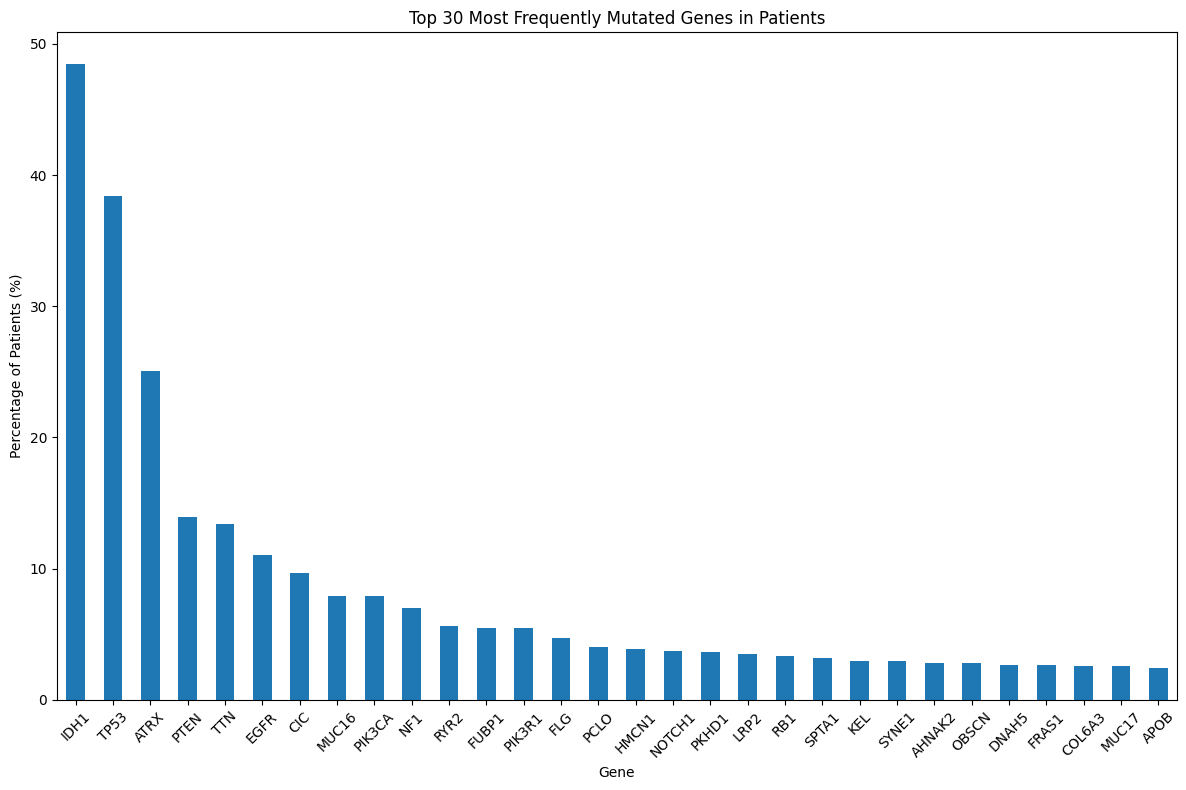

In [28]:
import matplotlib.pyplot as plt

# Step 1: Count unique patients for each gene
gene_patient_counts = mutations_merged_df.groupby('Hugo_Symbol')['Patient ID'].nunique()

# Step 2: Calculate the percentage of patients with mutations in each gene
total_unique_patients = mutations_merged_df['Patient ID'].nunique()
gene_patient_percentages = (gene_patient_counts / total_unique_patients) * 100

# Step 3: Select the top 20 most frequently mutated genes
top_30_genes = gene_patient_percentages.nlargest(30)

# Step 4: Plotting
plt.figure(figsize=(12, 8))
top_30_genes.plot(kind='bar')
plt.xlabel("Gene")
plt.ylabel("Percentage of Patients (%)")
plt.title("Top 30 Most Frequently Mutated Genes in Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
# Sum of the patient percentages in the top 20 most frequently mutated genes
top_30_percentage_sum = top_30_genes.sum()
print(f"Sum of the patient percentages in the top 30 most frequently mutated genes: {top_30_percentage_sum:.2f}%")


Sum of the patient percentages in the top 30 most frequently mutated genes: 253.96%


Total number of unique patients: 745
Number of patients without mutations in any of the top 30 genes: 57


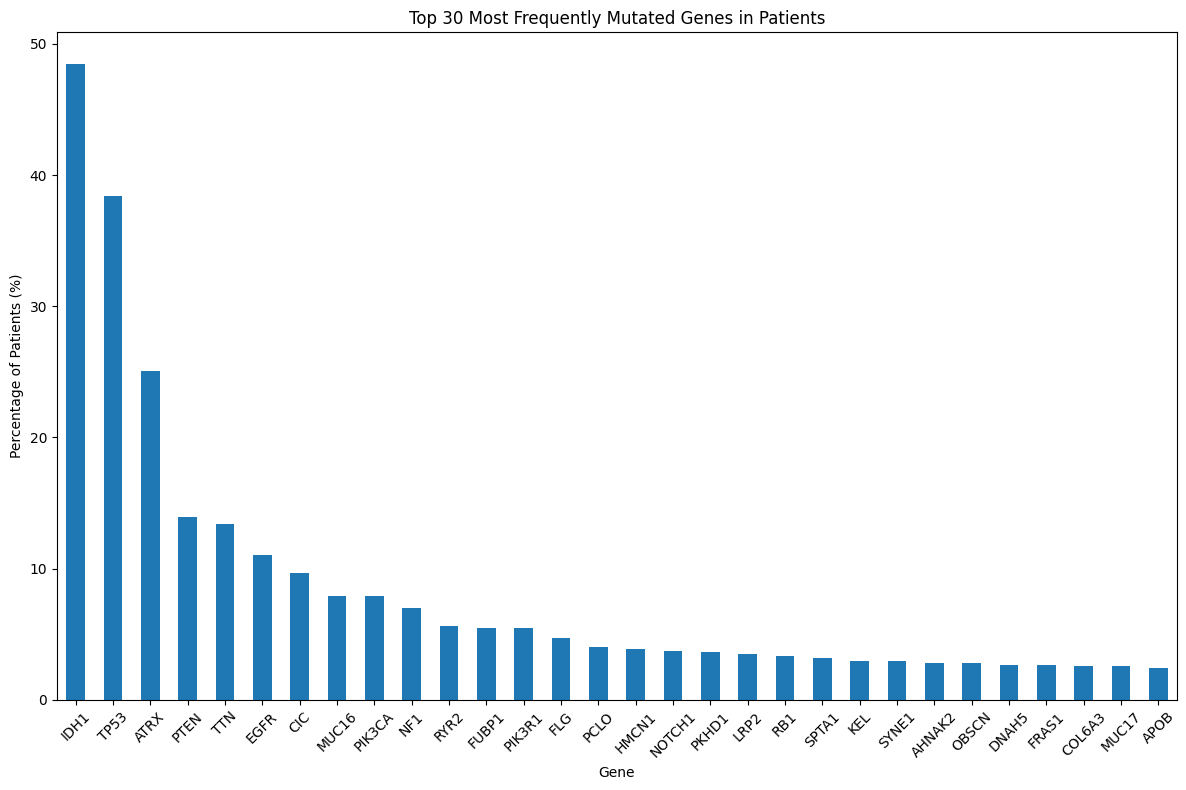

In [31]:
import matplotlib.pyplot as plt

# Step 1: Count unique patients for each gene
gene_patient_counts = mutations_merged_df.groupby('Hugo_Symbol')['Patient ID'].nunique()

# Step 2: Calculate the percentage of patients with mutations in each gene
total_unique_patients = mutations_merged_df['Patient ID'].nunique()
gene_patient_percentages = (gene_patient_counts / total_unique_patients) * 100

# Step 3: Select the top 30 most frequently mutated genes
top_30_genes = gene_patient_percentages.nlargest(30).index

# Step 4: Identify unique patients who have mutations in any of the top 30 genes
patients_with_top_30_genes = mutations_merged_df[mutations_merged_df['Hugo_Symbol'].isin(top_30_genes)]['Patient ID'].unique()
unique_patients_with_top_30_genes = len(set(patients_with_top_30_genes))

# Step 5: Calculate the number of patients without mutations in any of the top 30 genes
patients_without_top_30_genes = total_unique_patients - unique_patients_with_top_30_genes

# Display results
print(f"Total number of unique patients: {total_unique_patients}")
print(f"Number of patients without mutations in any of the top 30 genes: {patients_without_top_30_genes}")

# Step 6: Plotting the top 30 genes by percentage of patients with mutations
top_30_percentages = gene_patient_percentages[top_30_genes]

plt.figure(figsize=(12, 8))
top_30_percentages.plot(kind='bar')
plt.xlabel("Gene")
plt.ylabel("Percentage of Patients (%)")
plt.title("Top 30 Most Frequently Mutated Genes in Patients")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


We chose top 30 genes as features, now we are going to chose Diagnosis Age, IDH status, Sex, Grade, TMB (nonsynonymous) for clustering analysis

In [57]:
# Step 1: Filter mutations_merged_df to include only rows with the top 30 genes
top_30_genes = gene_patient_percentages.nlargest(30).index
top_30_mutations_df = mutations_merged_df[mutations_merged_df['Hugo_Symbol'].isin(top_30_genes)]

# Step 2: One-hot encode the presence of each of the top 30 genes
# This creates a new DataFrame with one-hot encoding, keeping each mutation per patient
top_30_encoded_df = top_30_mutations_df.copy()
for gene in top_30_genes:
    top_30_encoded_df[gene] = (top_30_encoded_df['Hugo_Symbol'] == gene).astype(int)

# Step 3: Remove the original 'Hugo_Symbol', 'Variant_Classification', and 'Tumor_Sample_Barcode' columns
top_30_encoded_df = top_30_encoded_df.drop(columns=['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode'])

# Display the resulting DataFrame for verification
print("Top 30 one-hot encoded DataFrame without Variant_Classification and Tumor_Sample_Barcode:")
print(top_30_encoded_df.head())


Top 30 one-hot encoded DataFrame without Variant_Classification and Tumor_Sample_Barcode:
      Patient ID        Sample ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  \
8   TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     1    0   
25  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
34  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
45  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
46  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   

    MUC16  ...  SPTA1  KEL  SYNE1  AHNAK2  OBSCN  DNAH5  FRAS1  COL6A3  MUC17  \
8       0  ...      0    0      0       0      0      0      0       0      0   
25      0  ...      0    0      0       0      0      0      0       0      1   
34      0  ...      0    0      0       0      0      0      0       0      0   
45      0  ...      0    0      0       0      0      0      0       0      0   
46      0  ...      0    0      0       0 

In [36]:
# Save the cleaned DataFrame
top_30_encoded_df.to_csv('top_30_encoded_df.csv', index=False)

In [66]:
# Select relevant columns from clinical_data
clinical_columns = ['Patient ID', 'Diagnosis Age', 'IDH status', 'Sex', 'Neoplasm Histologic Grade', 'TMB (nonsynonymous)']
clinical_selected = clinical_data[clinical_columns]

# Merge the selected clinical columns with top_30_encoded_df on 'Patient ID'
merged_top_30_df = pd.merge(top_30_encoded_df, clinical_selected, on='Patient ID', how='left')

# Display the resulting DataFrame for verification
print("Merged DataFrame with top 30 encoded genes and selected clinical data:")
print(merged_top_30_df.head())


Merged DataFrame with top 30 encoded genes and selected clinical data:
     Patient ID        Sample ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  \
0  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     1    0   
1  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
2  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
3  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
4  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   

   MUC16  ...  DNAH5  FRAS1  COL6A3  MUC17  APOB  Diagnosis Age  IDH status  \
0      0  ...      0      0       0      0     0             50          WT   
1      0  ...      0      0       0      1     0             50          WT   
2      0  ...      0      0       0      0     0             50          WT   
3      0  ...      0      0       0      0     0             50          WT   
4      0  ...      0      0       0      0     0             50          WT  

To go back to after clustering

In [67]:
merged_before_norm_df = merged_top_30_df.copy()

In [68]:
merged_before_norm_df

,Patient ID,Sample ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,...,DNAH5,FRAS1,COL6A3,MUC17,APOB,Diagnosis Age,IDH status,Sex,Neoplasm Histologic Grade,TMB (nonsynonymous)
0,TCGA-02-0003,TCGA-02-0003-01,0,0,0,0,0,1,0,0,...,0,0,0,0,0,50,WT,Male,G4,1.366667
1,TCGA-02-0003,TCGA-02-0003-01,0,0,0,0,0,0,0,0,...,0,0,0,1,0,50,WT,Male,G4,1.366667
2,TCGA-02-0003,TCGA-02-0003-01,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50,WT,Male,G4,1.366667
3,TCGA-02-0003,TCGA-02-0003-01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,50,WT,Male,G4,1.366667
4,TCGA-02-0003,TCGA-02-0003-01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,50,WT,Male,G4,1.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,TCGA-WY-A858,TCGA-WY-A858-01,1,0,0,0,0,0,0,0,...,0,0,0,0,0,32,Mutant,Female,G3,0.833333
2031,TCGA-WY-A858,TCGA-WY-A858-01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,32,Mutant,Female,G3,0.833333
2032,TCGA-WY-A858,TCGA-WY-A858-01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,32,Mutant,Female,G3,0.833333
2033,TCGA-WY-A858,TCGA-WY-A858-01,0,0,0,0,1,0,0,0,...,0,0,0,0,0,32,Mutant,Female,G3,0.833333


In [69]:
# One-hot encode the Neoplasm Histologic Grade column with 0/1 encoding
encoded_grades_df = pd.get_dummies(merged_top_30_df['Neoplasm Histologic Grade'], prefix='Grade').astype(int)

# Concatenate the encoded grades back to the main DataFrame
merged_top_30_df = pd.concat([merged_top_30_df, encoded_grades_df], axis=1)

# Drop the original Neoplasm Histologic Grade column if it is no longer needed
merged_top_30_df = merged_top_30_df.drop(columns=['Neoplasm Histologic Grade'])

# Display the resulting DataFrame for verification
print("DataFrame with one-hot encoded Neoplasm Histologic Grade as 0/1:")
print(merged_top_30_df.head())


DataFrame with one-hot encoded Neoplasm Histologic Grade as 0/1:
     Patient ID        Sample ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  \
0  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     1    0   
1  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
2  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
3  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
4  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   

   MUC16  ...  COL6A3  MUC17  APOB  Diagnosis Age  IDH status   Sex  \
0      0  ...       0      0     0             50          WT  Male   
1      0  ...       0      1     0             50          WT  Male   
2      0  ...       0      0     0             50          WT  Male   
3      0  ...       0      0     0             50          WT  Male   
4      0  ...       0      0     0             50          WT  Male   

   TMB (nonsynonymous)  Grade_G2  Grade_G3  Grade_G

In [63]:
merged_top_30_df

,Patient ID,Sample ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,...,COL6A3,MUC17,APOB,Diagnosis Age,IDH status,Sex,TMB (nonsynonymous),Grade_G2,Grade_G3,Grade_G4
0,TCGA-02-0003,TCGA-02-0003-01,0,0,0,0,0,1,0,0,...,0,0,0,50,WT,Male,1.366667,0,0,1
1,TCGA-02-0003,TCGA-02-0003-01,0,0,0,0,0,0,0,0,...,0,1,0,50,WT,Male,1.366667,0,0,1
2,TCGA-02-0003,TCGA-02-0003-01,0,0,0,0,0,0,0,0,...,0,0,0,50,WT,Male,1.366667,0,0,1
3,TCGA-02-0003,TCGA-02-0003-01,0,1,0,0,0,0,0,0,...,0,0,0,50,WT,Male,1.366667,0,0,1
4,TCGA-02-0003,TCGA-02-0003-01,0,1,0,0,0,0,0,0,...,0,0,0,50,WT,Male,1.366667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2030,TCGA-WY-A858,TCGA-WY-A858-01,1,0,0,0,0,0,0,0,...,0,0,0,32,Mutant,Female,0.833333,0,1,0
2031,TCGA-WY-A858,TCGA-WY-A858-01,0,1,0,0,0,0,0,0,...,0,0,0,32,Mutant,Female,0.833333,0,1,0
2032,TCGA-WY-A858,TCGA-WY-A858-01,0,1,0,0,0,0,0,0,...,0,0,0,32,Mutant,Female,0.833333,0,1,0
2033,TCGA-WY-A858,TCGA-WY-A858-01,0,0,0,0,1,0,0,0,...,0,0,0,32,Mutant,Female,0.833333,0,1,0


In [70]:
# Encode IDH status: 1 for 'Mutant', 0 for 'WT'
merged_top_30_df['IDH status'] = merged_top_30_df['IDH status'].map({'Mutant': 1, 'WT': 0}).astype(int)

# Encode Sex: 1 for 'Male', 0 for 'Female'
merged_top_30_df['Sex'] = merged_top_30_df['Sex'].map({'Male': 1, 'Female': 0}).astype(int)

# Display the resulting DataFrame for verification
print("DataFrame with encoded IDH status and Sex as 1/0:")
print(merged_top_30_df.head())


DataFrame with encoded IDH status and Sex as 1/0:
     Patient ID        Sample ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  \
0  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     1    0   
1  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
2  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
3  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
4  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   

   MUC16  ...  COL6A3  MUC17  APOB  Diagnosis Age  IDH status  Sex  \
0      0  ...       0      0     0             50           0    1   
1      0  ...       0      1     0             50           0    1   
2      0  ...       0      0     0             50           0    1   
3      0  ...       0      0     0             50           0    1   
4      0  ...       0      0     0             50           0    1   

   TMB (nonsynonymous)  Grade_G2  Grade_G3  Grade_G4  
0             1.3

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize 'Diagnosis Age' and 'TMB (nonsynonymous)' columns
merged_top_30_df[['Diagnosis Age', 'TMB (nonsynonymous)']] = scaler.fit_transform(
    merged_top_30_df[['Diagnosis Age', 'TMB (nonsynonymous)']]
)

# Save the result into a new DataFrame
normalized_df = merged_top_30_df.copy()

# Display the resulting DataFrame for verification
print("Normalized DataFrame with Diagnosis Age and TMB (nonsynonymous):")
print(normalized_df.head())


Normalized DataFrame with Diagnosis Age and TMB (nonsynonymous):
     Patient ID        Sample ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  \
0  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     1    0   
1  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
2  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
3  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
4  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   

   MUC16  ...  COL6A3  MUC17  APOB  Diagnosis Age  IDH status  Sex  \
0      0  ...       0      0     0           0.48           0    1   
1      0  ...       0      1     0           0.48           0    1   
2      0  ...       0      0     0           0.48           0    1   
3      0  ...       0      0     0           0.48           0    1   
4      0  ...       0      0     0           0.48           0    1   

   TMB (nonsynonymous)  Grade_G2  Grade_G3  Grade_G4  
0 

In [46]:
print(normalized_df.columns.tolist())

['Patient ID', 'Sample ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO', 'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'SPTA1', 'KEL', 'SYNE1', 'AHNAK2', 'OBSCN', 'DNAH5', 'FRAS1', 'COL6A3', 'MUC17', 'APOB', 'Diagnosis Age', 'IDH status', 'Sex', 'TMB (nonsynonymous)', 'Grade_G2', 'Grade_G3', 'Grade_G4']


Clustering
Unsupervised Clustering of Molecular Subtypes
   - Goal: Discover molecular subtypes of the cancer based on mutation patterns and clinical features.
   - Features to Use: `Hugo_Symbol` (one-hot encoded for multiple mutations), `Pathway`, `IDH Status`, `WHO Grade`, `Enhancing`, `Sample Type`, `TMB`, `Fraction Genome Altered`.
   - Approach:Use algorithms like K-Means, Hierarchical Clustering, or DBSCAN for clustering. Apply dimensionality reduction techniques like PCA to visualize the clusters.
   -Evaluation:Examine how clusters correlate with clinical features such as survival outcomes, IDH status, or WHO Grade

In [47]:
# Drop 'Sample ID' as it's not needed for clustering
clustering_df = normalized_df.drop(columns=['Sample ID'])

# Group by 'Patient ID' and aggregate
# For binary columns (gene mutations), 'max' will retain a 1 if the gene is mutated in any sample for that patient.
# For continuous columns (Diagnosis Age and TMB), 'mean' will take the average value across samples.
clustering_df = clustering_df.groupby('Patient ID', as_index=False).agg({
    **{col: 'max' for col in clustering_df.columns if col not in ['Patient ID', 'Diagnosis Age', 'TMB (nonsynonymous)']},
    'Diagnosis Age': 'mean',
    'TMB (nonsynonymous)': 'mean'
})

# Display the resulting DataFrame for verification
print("Clustering DataFrame with features aggregated by Patient ID:")
print(clustering_df.head())


Clustering DataFrame with features aggregated by Patient ID:
     Patient ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  ...  \
0  TCGA-02-0003     0     1     0     0    0     1    0      0       0  ...   
1  TCGA-02-0033     0     1     0     0    0     0    0      0       1  ...   
2  TCGA-02-0047     0     0     0     0    0     0    0      0       1  ...   
3  TCGA-02-0055     0     1     0     1    1     0    0      0       0  ...   
4  TCGA-02-2470     0     0     0     1    0     0    0      0       0  ...   

   COL6A3  MUC17  APOB  IDH status  Sex  Grade_G2  Grade_G3  Grade_G4  \
0       0      1     0           0    1         0         0         1   
1       0      0     0           0    1         0         0         1   
2       0      0     0           0    1         0         0         1   
3       1      0     0           0    0         0         0         1   
4       0      0     0           0    1         0         0         1   

   Diagnosis Age  TMB (no

In [80]:
clustering_df

,Patient ID,IDH1,TP53,ATRX,PTEN,TTN,EGFR,CIC,MUC16,PIK3CA,...,MUC17,APOB,IDH status,Sex,Grade_G2,Grade_G3,Grade_G4,Diagnosis Age,TMB (nonsynonymous),Cluster
0,TCGA-02-0003,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0.480000,0.106101,2
1,TCGA-02-0033,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0.533333,0.053050,2
2,TCGA-02-0047,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0.853333,0.119363,2
3,TCGA-02-0055,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0.640000,0.108753,2
4,TCGA-02-2470,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0.573333,0.111406,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,TCGA-VW-A7QS,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0.280000,0.071618,3
684,TCGA-VW-A8FI,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0.693333,0.095491,1
685,TCGA-W9-A837,1,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0.440000,0.045093,6
686,TCGA-WH-A86K,1,1,0,0,0,0,0,0,0,...,0,0,1,1,1,0,0,0.680000,0.071618,5


To keep 57 patients without mutations

In [ ]:
# To keep 57 patients without mutations
#Initial Step: Create clustering_df with features aggregated by Patient ID
# (Code from previous response)
clustering_df = normalized_df.drop(columns=['Sample ID'])
clustering_df = clustering_df.groupby('Patient ID', as_index=False).agg({
    **{col: 'max' for col in clustering_df.columns if col not in ['Patient ID', 'Diagnosis Age', 'TMB (nonsynonymous)']},
    'Diagnosis Age': 'mean',
    'TMB (nonsynonymous)': 'mean'
})

# Step 2: Identify patients without mutations in the top 30 genes and add them back with zeros for mutation columns

# List of top 30 gene mutation columns
mutation_columns = [col for col in clustering_df.columns if col in top_30_genes]

# Find patients without any mutations in the top 30 genes
patients_with_mutations = clustering_df[mutation_columns].sum(axis=1) > 0
patients_without_mutations_df = clustering_df[~patients_with_mutations].copy()

# Set all gene mutation columns to 0 for these patients
for gene in top_30_genes:
    patients_without_mutations_df[gene] = 0

# Concatenate the two DataFrames to ensure all patients are included
clustering_df = pd.concat([clustering_df[patients_with_mutations], patients_without_mutations_df], ignore_index=True)

# Display the final DataFrame for verification
print("Final clustering DataFrame including patients without mutations in the top 30 genes:")
print(clustering_df.head())


PCA before hierarchical clustering

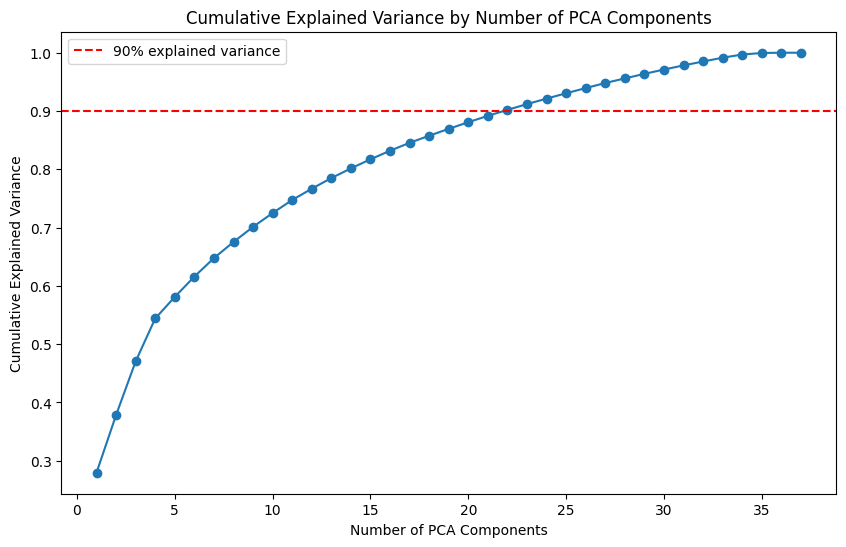

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Define the features from clustering_df for PCA, excluding 'Patient ID'
features = clustering_df.drop(columns=['Patient ID'])  # Only feature columns are used for PCA

# Step 2: Apply PCA without specifying n_components initially to calculate explained variance
pca = PCA()
pca.fit(features)

# Step 3: Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of PCA Components')
plt.axhline(y=0.9, color='r', linestyle='--', label="90% explained variance")
plt.legend()
plt.show()


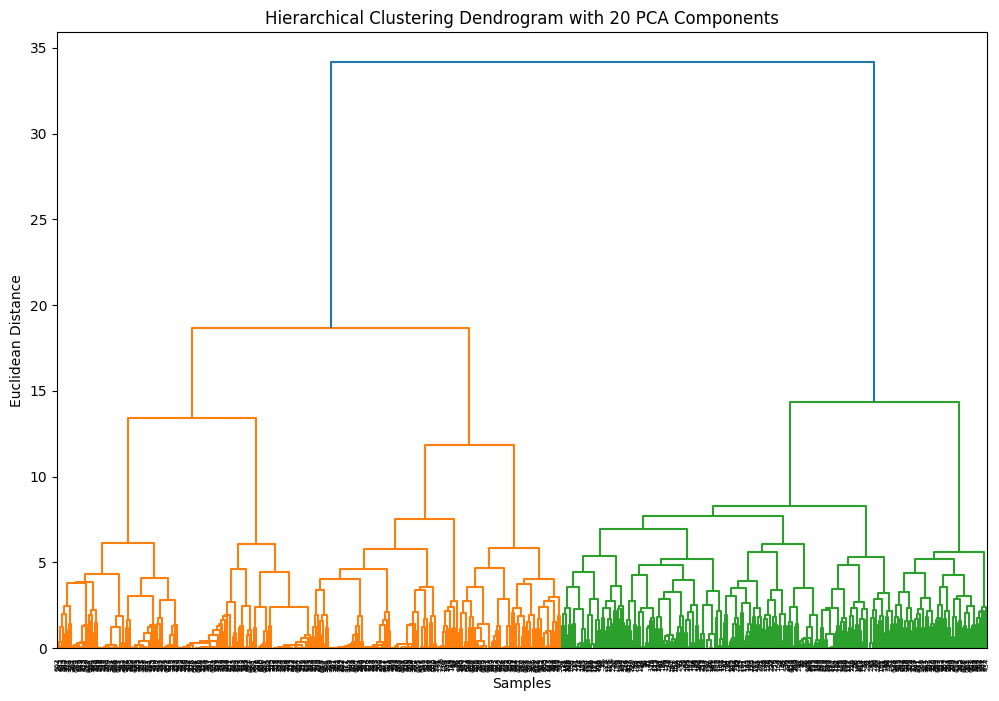

In [51]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram

# Step 1: Apply PCA with 20 components
pca = PCA(n_components=20)
pca_result = pca.fit_transform(features)  # 'features' should be clustering_df without 'Patient ID'

# Step 2: Perform hierarchical clustering on the PCA-reduced data
# Using 'ward' linkage, which minimizes variance within clusters
linked = linkage(pca_result, method='ward')

# Step 3: Plot the dendrogram for visual inspection
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Hierarchical Clustering Dendrogram with 20 PCA Components")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()


From the dendrogram, a cutoff at a Euclidean distance around 15-20 seems reasonable, as it separates the branches into several clear clusters.
This cutoff will likely yield between 2 to 5 clusters. You could experiment with cutting the tree at this height to see if it produces meaningful clusters.

In [53]:
from scipy.cluster.hierarchy import fcluster

# Step 4: Define clusters based on the chosen distance cutoff
distance_cutoff = 10  # Adjust this based on dendrogram inspection
clusters = fcluster(linked, distance_cutoff, criterion='distance')

# Add the cluster labels to the original DataFrame
clustering_df['Cluster'] = clusters

# Display the first few rows to verify
print("Data with assigned clusters based on hierarchical clustering:")
print(clustering_df[['Patient ID', 'Cluster']].head())


Data with assigned clusters based on hierarchical clustering:
     Patient ID  Cluster
0  TCGA-02-0003        2
1  TCGA-02-0033        2
2  TCGA-02-0047        2
3  TCGA-02-0055        2
4  TCGA-02-2470        2


In [72]:
# Merge the cluster labels back into the original untransformed data
merged_before_norm_df_with_clusters = merged_before_norm_df.merge(clustering_df[['Patient ID', 'Cluster']], on='Patient ID', how='left')

# Display the first few rows to verify
print("Original DataFrame with Cluster Assignments:")
print(merged_before_norm_df_with_clusters.head())


Original DataFrame with Cluster Assignments:
     Patient ID        Sample ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  \
0  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     1    0   
1  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
2  TCGA-02-0003  TCGA-02-0003-01     0     0     0     0    0     0    0   
3  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   
4  TCGA-02-0003  TCGA-02-0003-01     0     1     0     0    0     0    0   

   MUC16  ...  FRAS1  COL6A3  MUC17  APOB  Diagnosis Age  IDH status   Sex  \
0      0  ...      0       0      0     0             50          WT  Male   
1      0  ...      0       0      1     0             50          WT  Male   
2      0  ...      0       0      0     0             50          WT  Male   
3      0  ...      0       0      0     0             50          WT  Male   
4      0  ...      0       0      0     0             50          WT  Male   

   Neoplasm Histologic Grade 

In [73]:
# Group by cluster and calculate summary statistics
cluster_profile = merged_before_norm_df_with_clusters.groupby('Cluster').agg({
    'Diagnosis Age': ['mean', 'median'],
    'TMB (nonsynonymous)': ['mean', 'median'],
    'IDH status': lambda x: (x == 'Mutant').mean(),  # Percentage of Mutant IDH status
    'Sex': lambda x: (x == 'Male').mean(),           # Percentage of Male patients
    'Neoplasm Histologic Grade': lambda x: x.value_counts().idxmax(),  # Most common grade per cluster
    **{gene: 'mean' for gene in merged_before_norm_df_with_clusters.columns if gene in top_30_genes}  # Mean mutation frequency per gene
})

# Display cluster profiles
print("Cluster Profile Summary:")
print(cluster_profile)


Cluster Profile Summary:
        Diagnosis Age        TMB (nonsynonymous)           IDH status  \
                 mean median                mean    median   <lambda>   
Cluster                                                                 
1           53.687500   57.0            1.773958  1.100000   0.041667   
2           63.201977   63.0            1.487147  1.433333   0.000000   
3           49.296117   52.0            0.861003  0.766667   1.000000   
4           38.240838   36.5            0.812565  0.766667   1.000000   
5           37.461538   36.0            0.627825  0.600000   1.000000   
6           44.739796   43.5            0.618197  0.600000   1.000000   

              Sex Neoplasm Histologic Grade      IDH1      TP53      ATRX  \
         <lambda>                  <lambda>      mean      mean      mean   
Cluster                                                                     
1        0.567708                        G3  0.005208  0.083333  0.031250   
2        

Focused Cluster Summary:
         Diagnosis Age  TMB (nonsynonymous)  IDH status       Sex  \
Cluster                                                             
1            53.687500             1.773958    0.041667  0.567708   
2            63.201977             1.487147    0.000000  0.596045   
3            49.296117             0.861003    1.000000  0.538835   
4            38.240838             0.812565    1.000000  0.649215   
5            37.461538             0.627825    1.000000  0.575499   
6            44.739796             0.618197    1.000000  0.540816   

        Neoplasm Histologic Grade  
Cluster                            
1                              G3  
2                              G4  
3                              G3  
4                              G3  
5                              G2  
6                              G2  


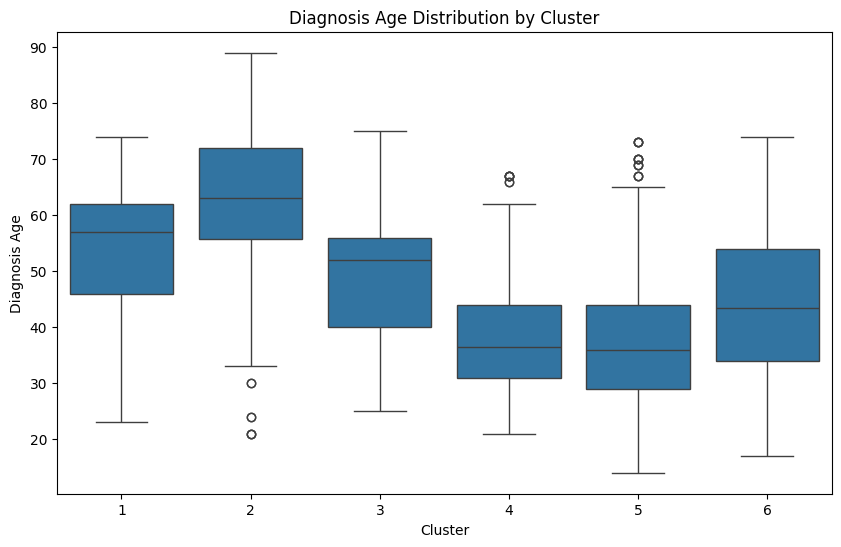

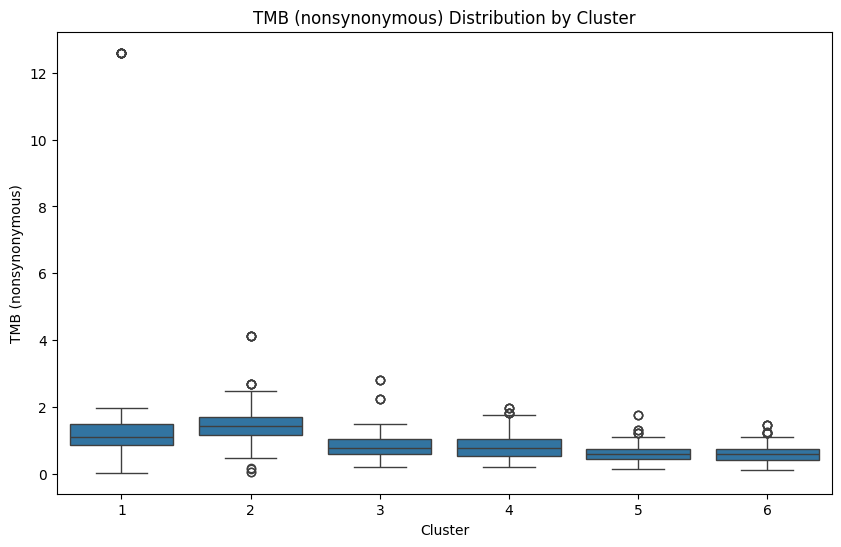

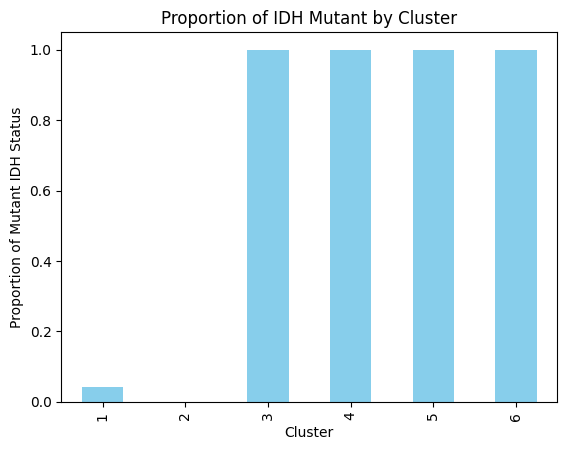

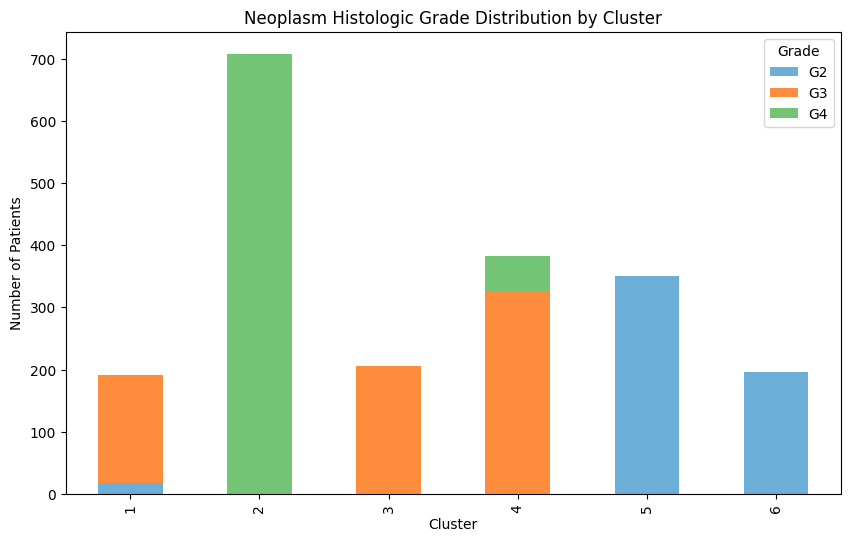

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Focused summary statistics by Cluster
focused_summary = merged_before_norm_df_with_clusters.groupby('Cluster').agg({
    'Diagnosis Age': 'mean',
    'TMB (nonsynonymous)': 'mean',
    'IDH status': lambda x: (x == 'Mutant').mean(),  # Proportion of IDH Mutant patients
    'Sex': lambda x: (x == 'Male').mean(),           # Proportion of Male patients
    'Neoplasm Histologic Grade': lambda x: x.value_counts().idxmax()  # Most common grade
})

print("Focused Cluster Summary:")
print(focused_summary)

# Step 2: Visualizations for Diagnosis Age, TMB, IDH status, and Neoplasm Histologic Grade

# Box plot for Diagnosis Age by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_before_norm_df_with_clusters, x='Cluster', y='Diagnosis Age')
plt.title("Diagnosis Age Distribution by Cluster")
plt.show()

# Box plot for TMB (nonsynonymous) by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_before_norm_df_with_clusters, x='Cluster', y='TMB (nonsynonymous)')
plt.title("TMB (nonsynonymous) Distribution by Cluster")
plt.show()

# Bar plot for proportion of IDH Mutant by Cluster
idh_status_by_cluster = merged_before_norm_df_with_clusters.groupby('Cluster')['IDH status'].apply(lambda x: (x == 'Mutant').mean())
idh_status_by_cluster.plot(kind='bar', color='skyblue')
plt.title("Proportion of IDH Mutant by Cluster")
plt.ylabel("Proportion of Mutant IDH Status")
plt.xlabel("Cluster")
plt.show()

# Stacked bar plot for Neoplasm Histologic Grade by Cluster
grade_distribution = merged_before_norm_df_with_clusters.groupby(['Cluster', 'Neoplasm Histologic Grade']).size().unstack().fillna(0)
grade_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#6baed6', '#fd8d3c', '#74c476'])  # Colors for G2, G3, G4
plt.title("Neoplasm Histologic Grade Distribution by Cluster")
plt.ylabel("Number of Patients")
plt.xlabel("Cluster")
plt.legend(title="Grade")
plt.show()


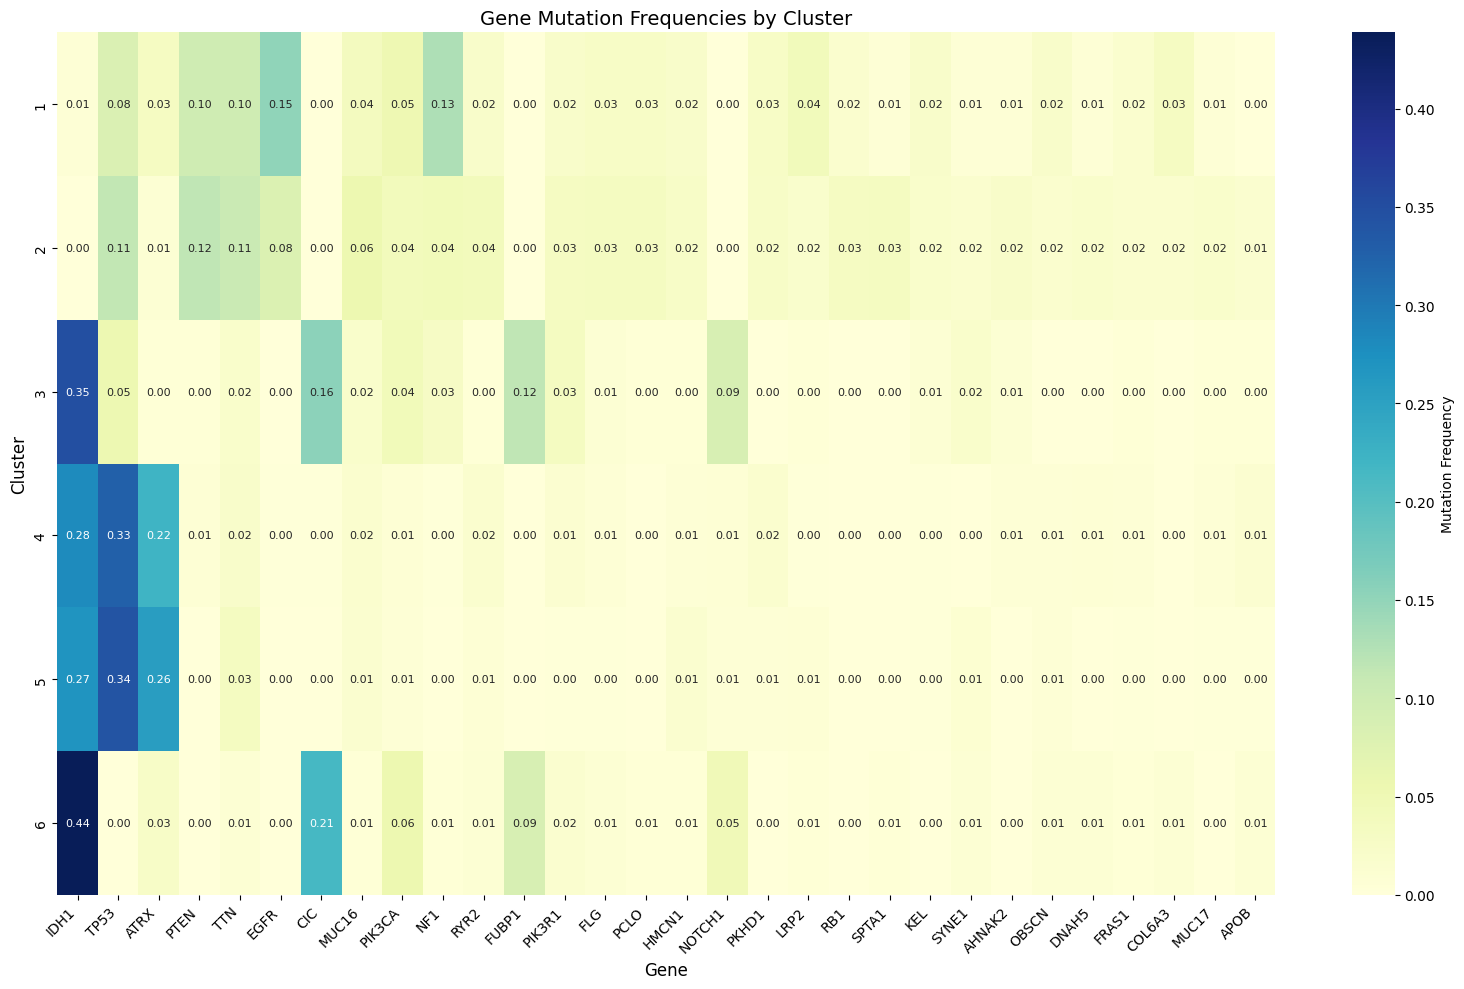

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the figure size and font settings for better readability
plt.figure(figsize=(16, 10))  # Increase figure size
sns.heatmap(gene_contribution, annot=True, fmt=".2f", cmap="YlGnBu",
            cbar_kws={'label': 'Mutation Frequency'}, annot_kws={"size": 8})

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Gene Mutation Frequencies by Cluster", fontsize=14)
plt.xlabel("Gene", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
plt.tight_layout()
plt.show()


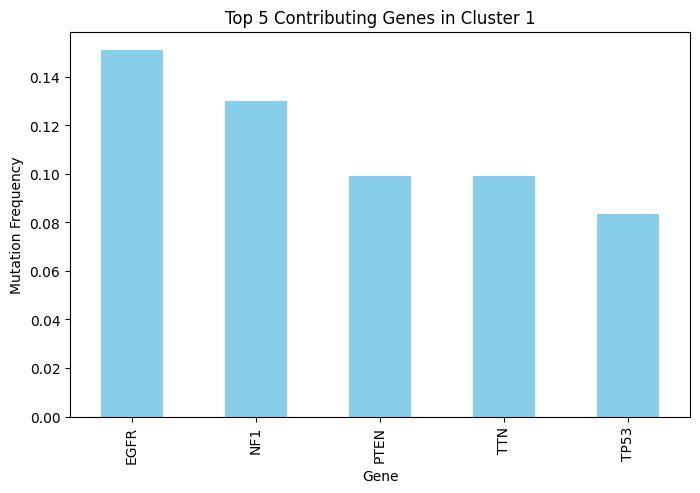

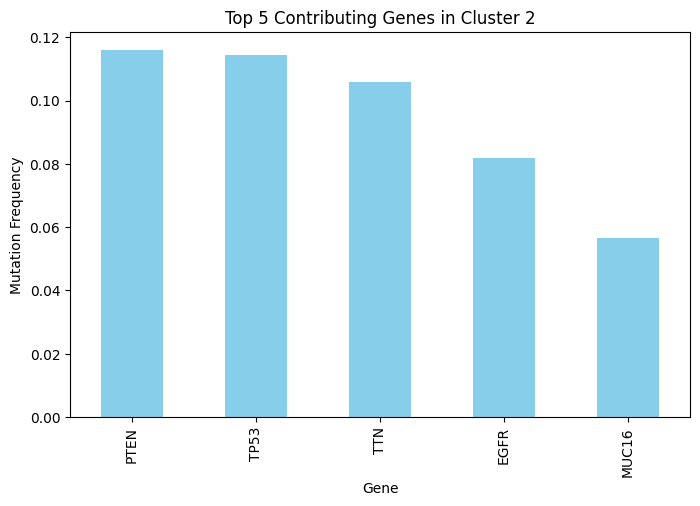

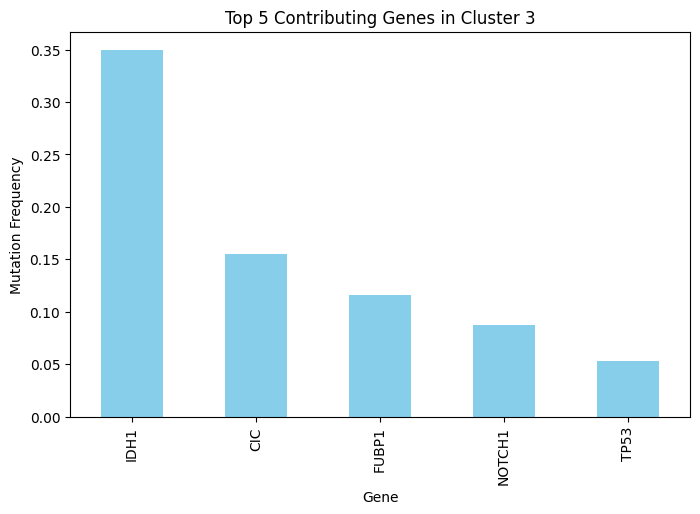

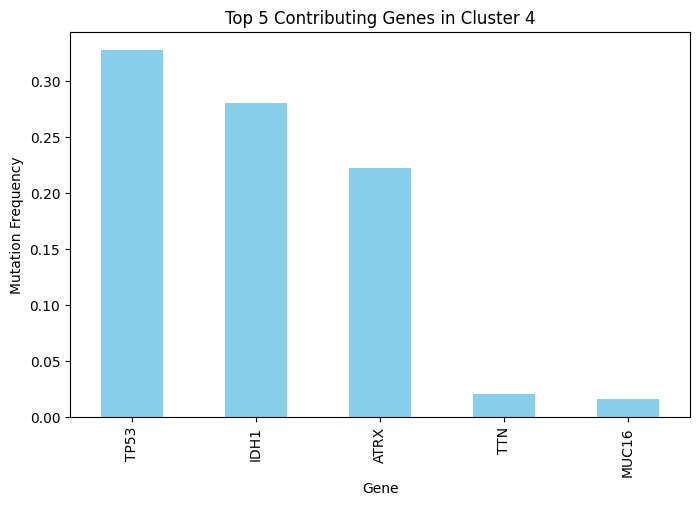

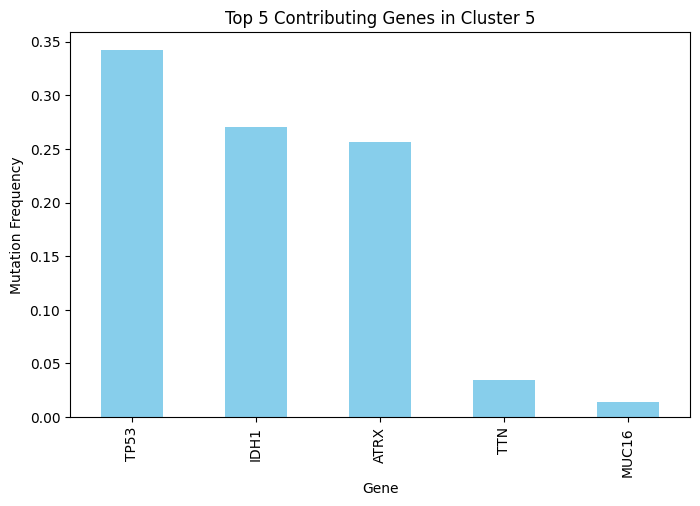

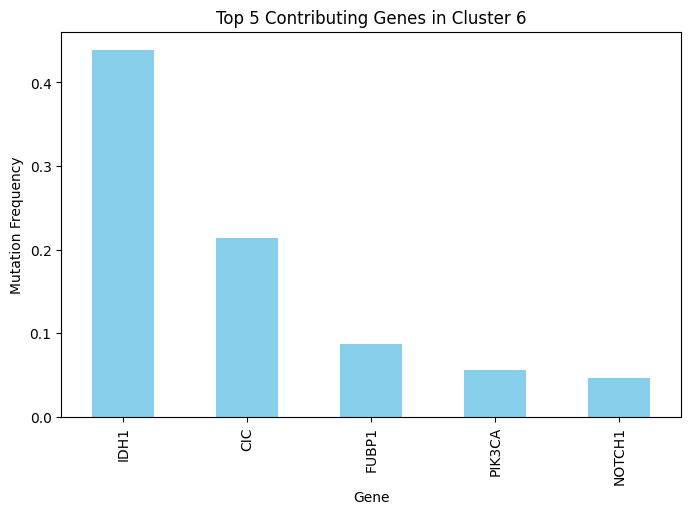

In [78]:
# For each cluster, find the top 5 genes with highest mutation frequencies
top_genes_per_cluster = {}
for cluster in gene_contribution.index:
    top_genes = gene_contribution.loc[cluster].nlargest(5)
    top_genes_per_cluster[cluster] = top_genes

# Plot the top 5 genes for each cluster
for cluster, top_genes in top_genes_per_cluster.items():
    plt.figure(figsize=(8, 5))
    top_genes.plot(kind='bar', color='skyblue')
    plt.title(f"Top 5 Contributing Genes in Cluster {cluster}")
    plt.xlabel("Gene")
    plt.ylabel("Mutation Frequency")
    plt.show()


Prediction of survival

In [87]:
print("Columns in the clustering DataFrame:")
print(clustering_df.columns)

Columns in the clustering DataFrame:
Index(['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'CIC',
       'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'FUBP1', 'PIK3R1', 'FLG', 'PCLO',
       'HMCN1', 'NOTCH1', 'PKHD1', 'LRP2', 'RB1', 'SPTA1', 'KEL', 'SYNE1',
       'AHNAK2', 'OBSCN', 'DNAH5', 'FRAS1', 'COL6A3', 'MUC17', 'APOB',
       'IDH status', 'Sex', 'Grade_G2', 'Grade_G3', 'Grade_G4',
       'Diagnosis Age', 'TMB (nonsynonymous)', 'Cluster'],
      dtype='object')


In [88]:
print("Columns in the clinical DataFrame:")
print(clinical_data.columns)

Columns in the clinical DataFrame:
Index(['Patient ID', 'Sample ID', 'Absolute Extract Ploidy', 'Diagnosis Age',
       'ATRX status', 'BCR Status', 'BRAF-KIAA1549 fusion',
       'BRAF V600E status', 'Cancer Type', 'Cancer Type Detailed',
       'Chr 19/20 co-gain', 'Chr 7 gain/Chr 10 loss', 'DAXX status',
       'ESTIMATE combined score', 'ESTIMATE immune score',
       'ESTIMATE stromal score', 'Neoplasm Histologic Grade',
       'Neoplasm Histologic Type Name', 'HM27', 'HM450', 'IDH-1P10Q Subtype',
       'IDH/codel subtype', 'IDH-specific DNA Methylation Cluster',
       'IDH-specific RNA Expression Cluster', 'IDH status', 'Mutation Count',
       'Oncotree Code', 'Original Subtype', 'Overall Survival (Months)',
       'Overall Survival Status', 'Pan-Glioma DNA Methylation Cluster',
       'Pan-Glioma RNA Expression Cluster', 'Percent aneuploidy', 'Sex',
       'Study', 'Telomere length estimate in blood normal (Kb)',
       'Telomere length estimate in tumor (Kb)', 'Telomere Main

In [91]:
clinical_data

,Patient ID,Sample ID,Absolute Extract Ploidy,Diagnosis Age,ATRX status,BCR Status,BRAF-KIAA1549 fusion,BRAF V600E status,Cancer Type,Cancer Type Detailed,...,Sex,Study,Telomere length estimate in blood normal (Kb),Telomere length estimate in tumor (Kb),Telomere Maintenance,TERT expression (log2),TERT expression status,TERT promoter status,TMB (nonsynonymous),Derived_Patient_ID
0,TCGA-02-0001,TCGA-02-0001-01,3.47,44,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-02-0001-01
1,TCGA-02-0003,TCGA-02-0003-01,1.96,50,WT,IGC,NaN,WT,Glioma,Diffuse Glioma,...,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,1.366667,TCGA-02-0003-01
2,TCGA-02-0004,TCGA-02-0004-01,NaN,59,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,Male,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-02-0004-01
3,TCGA-02-0006,TCGA-02-0006-01,1.93,56,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-02-0006-01
4,TCGA-02-0007,TCGA-02-0007-01,1.89,40,NaN,IGC,NaN,NaN,Glioma,Diffuse Glioma,...,Female,Glioblastoma multiforme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TCGA-02-0007-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,TCGA-VW-A7QS,TCGA-VW-A7QS-01,1.95,35,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,Female,Brain Lower Grade Glioma,NaN,NaN,NaN,4.754888,Expressed,NaN,0.933333,TCGA-VW-A7QS-01
1043,TCGA-VW-A8FI,TCGA-VW-A8FI-01,NaN,66,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,6.643856,Expressed,NaN,1.233333,TCGA-VW-A8FI-01
1044,TCGA-W9-A837,TCGA-W9-A837-01,NaN,47,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,3.169925,Expressed,NaN,0.600000,TCGA-W9-A837-01
1045,TCGA-WH-A86K,TCGA-WH-A86K-01,NaN,65,WT,NCH,WT,WT,Glioma,Diffuse Glioma,...,Male,Brain Lower Grade Glioma,NaN,NaN,NaN,0.000000,Not expressed,NaN,0.933333,TCGA-WH-A86K-01


In [92]:
# Create the 'prediction' DataFrame based on clustering_df by dropping the 'Cluster' column
prediction = clustering_df.drop(columns=['Cluster']).copy()

# Filter clinical_data to include only the 688 Patient IDs present in clustering_df
filtered_clinical_data = clinical_data[clinical_data['Patient ID'].isin(prediction['Patient ID'])]

# Merge 'Overall Survival Status' directly from clinical_data into prediction based on 'Patient ID'
prediction = prediction.merge(
    filtered_clinical_data[['Patient ID', 'Overall Survival Status']],
    on='Patient ID',
    how='left'
)

# Confirm the merge by checking unique values and any missing entries in 'Overall Survival Status'
print("Unique values in 'Overall Survival Status' in prediction:", prediction['Overall Survival Status'].unique())
print("Number of missing values in 'Overall Survival Status':", prediction['Overall Survival Status'].isna().sum())

# Display the final DataFrame to confirm the structure
print(prediction.head())


Unique values in 'Overall Survival Status' in prediction: ['1:DECEASED' '0:LIVING' nan]
Number of missing values in 'Overall Survival Status': 1
     Patient ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  ...  \
0  TCGA-02-0003     0     1     0     0    0     1    0      0       0  ...   
1  TCGA-02-0033     0     1     0     0    0     0    0      0       1  ...   
2  TCGA-02-0047     0     0     0     0    0     0    0      0       1  ...   
3  TCGA-02-0055     0     1     0     1    1     0    0      0       0  ...   
4  TCGA-02-2470     0     0     0     1    0     0    0      0       0  ...   

   MUC17  APOB  IDH status  Sex  Grade_G2  Grade_G3  Grade_G4  Diagnosis Age  \
0      1     0           0    1         0         0         1       0.480000   
1      0     0           0    1         0         0         1       0.533333   
2      0     0           0    1         0         0         1       0.853333   
3      0     0           0    0         0         0         

In [93]:
# Map 'Overall Survival Status' to 0 for 'LIVING' and 1 for 'DECEASED'
prediction['Overall Survival Status'] = prediction['Overall Survival Status'].map({'0:LIVING': 0, '1:DECEASED': 1})

# Verify the transformation and check for any remaining NaN values
print("Unique values in 'Overall Survival Status' after transformation:", prediction['Overall Survival Status'].unique())
print("Number of missing values in 'Overall Survival Status' after transformation:", prediction['Overall Survival Status'].isna().sum())

# Display the final DataFrame to confirm the transformation
print(prediction.head())


Unique values in 'Overall Survival Status' after transformation: [ 1.  0. nan]
Number of missing values in 'Overall Survival Status' after transformation: 1
     Patient ID  IDH1  TP53  ATRX  PTEN  TTN  EGFR  CIC  MUC16  PIK3CA  ...  \
0  TCGA-02-0003     0     1     0     0    0     1    0      0       0  ...   
1  TCGA-02-0033     0     1     0     0    0     0    0      0       1  ...   
2  TCGA-02-0047     0     0     0     0    0     0    0      0       1  ...   
3  TCGA-02-0055     0     1     0     1    1     0    0      0       0  ...   
4  TCGA-02-2470     0     0     0     1    0     0    0      0       0  ...   

   MUC17  APOB  IDH status  Sex  Grade_G2  Grade_G3  Grade_G4  Diagnosis Age  \
0      1     0           0    1         0         0         1       0.480000   
1      0     0           0    1         0         0         1       0.533333   
2      0     0           0    1         0         0         1       0.853333   
3      0     0           0    0         0       

In [94]:
# Convert 'Overall Survival Status' to integer type to remove decimals
prediction['Overall Survival Status'] = prediction['Overall Survival Status'].astype('Int64')


In [95]:
# Save the cleaned DataFrame
prediction.to_csv('prediction.csv', index=False)

Features selection

In [98]:
# Remove rows where 'Overall Survival Status' is NaN
prediction = prediction.dropna(subset=['Overall Survival Status'])

# Redefine features and target after removing rows with NaN in Overall Survival Status
X = prediction.drop(columns=['Overall Survival Status'])  # Keep Patient ID for traceability
y = prediction['Overall Survival Status']  # Target variable

In [99]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

# Define features (X) and target variable (y) while retaining Patient ID
X = prediction.drop(columns=['Overall Survival Status'])  # Keep Patient ID for traceability
y = prediction['Overall Survival Status']  # Target variable

# Step 1: Apply each feature selection method

# 1a. RFE with Random Forest
rfe_rf = RFE(estimator=RandomForestClassifier(), n_features_to_select=15)
rfe_rf.fit(X.drop(columns=['Patient ID']), y)  # Exclude Patient ID during feature selection

# 1b. Random Forest feature importances
rf = RandomForestClassifier()
rf.fit(X.drop(columns=['Patient ID']), y)
rf_importances = rf.feature_importances_

# 1c. LASSO for feature selection
lasso = Lasso(alpha=0.01)
lasso.fit(X.drop(columns=['Patient ID']), y)
lasso_importances = lasso.coef_

# Step 2: Combine selections with a voting mechanism
selected_features = pd.DataFrame({
    'Feature': X.columns.drop('Patient ID'),  # List features excluding Patient ID
    'RFE_RF': rfe_rf.support_,
    'RF_Importance': rf_importances,
    'LASSO_Importance': lasso_importances
})

# Voting Rule: Retain features selected by at least two methods
selected_features['Selected'] = ((selected_features['RFE_RF']) |
                                 (selected_features['RF_Importance'] > 0.01) |
                                 (selected_features['LASSO_Importance'] != 0))

# Final list of selected features, including Patient ID for tracking
final_selected_features = ['Patient ID'] + selected_features[selected_features['Selected']]['Feature'].tolist()
print("Final selected features:", final_selected_features)


Final selected features: ['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'PIK3R1', 'FLG', 'PCLO', 'PKHD1', 'LRP2', 'RB1', 'AHNAK2', 'MUC17', 'IDH status', 'Sex', 'Grade_G2', 'Grade_G3', 'Grade_G4', 'Diagnosis Age', 'TMB (nonsynonymous)']


In [100]:
num_selected_features = len(final_selected_features) - 1  # Subtract 1 for 'Patient ID'
print("Number of selected features (excluding Patient ID):", num_selected_features)

Number of selected features (excluding Patient ID): 25


10-fold cross validation with Random forest

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features (X) and target (y)
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Keep only selected features
y = prediction['Overall Survival Status']

# Initialize the Random Forest model
model = RandomForestClassifier(random_state=42)

# Apply 10-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')

# Display the results
print("Cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))


Cross-validation scores for each fold: [0.39130435 0.43478261 0.89855072 0.8115942  0.84057971 0.97101449
 0.7826087  0.64705882 0.66176471 0.72058824]
Mean cross-validation accuracy: 0.7159846547314579
Standard deviation of cross-validation accuracy: 0.17879544818769882


10-fold cross validation with SVM

In [102]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features (X) and target variable (y)
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the SVM model with probabilistic output enabled
svm_model = SVC(probability=True, random_state=42)

# Perform 10-fold cross-validation on SVM
svm_cv_scores = cross_val_score(svm_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("SVM cross-validation scores for each fold:", svm_cv_scores)
print("Mean cross-validation accuracy for SVM:", np.mean(svm_cv_scores))
print("Standard deviation of cross-validation accuracy for SVM:", np.std(svm_cv_scores))


SVM cross-validation scores for each fold: [0.4057971  0.39130435 0.95652174 0.95652174 0.94202899 0.95652174
 0.84057971 0.64705882 0.63235294 0.70588235]
Mean cross-validation accuracy for SVM: 0.74345694799659
Standard deviation of cross-validation accuracy for SVM: 0.21121734667735936


10-fold cross validation with LR

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42)

# Perform 10-fold cross-validation on Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Logistic Regression cross-validation scores for each fold:", lr_cv_scores)
print("Mean cross-validation accuracy for Logistic Regression:", np.mean(lr_cv_scores))
print("Standard deviation of cross-validation accuracy for Logistic Regression:", np.std(lr_cv_scores))


Logistic Regression cross-validation scores for each fold: [0.36231884 0.39130435 0.94202899 0.94202899 0.89855072 0.95652174
 0.84057971 0.69117647 0.66176471 0.76470588]
Mean cross-validation accuracy for Logistic Regression: 0.7450980392156863
Standard deviation of cross-validation accuracy for Logistic Regression: 0.20901061952507236


10-fold cross-validation with K-Nearest Neighbors (KNN):

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the KNN model with n_neighbors=6
knn_model = KNeighborsClassifier(n_neighbors=6)

# Perform 10-fold cross-validation on KNN
knn_cv_scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("KNN (n_neighbors=6) cross-validation scores for each fold:", knn_cv_scores)
print("Mean cross-validation accuracy for KNN:", np.mean(knn_cv_scores))
print("Standard deviation of cross-validation accuracy for KNN:", np.std(knn_cv_scores))


KNN (n_neighbors=6) cross-validation scores for each fold: [0.43478261 0.39130435 0.88405797 0.84057971 0.76811594 0.89855072
 0.7826087  0.69117647 0.63235294 0.73529412]
Mean cross-validation accuracy for KNN: 0.7058823529411765
Standard deviation of cross-validation accuracy for KNN: 0.1660461573020453


10-fold cross-validation with AdaBoost:

In [105]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(random_state=42)

# Perform 10-fold cross-validation on AdaBoost
ada_cv_scores = cross_val_score(ada_model, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("AdaBoost cross-validation scores for each fold:", ada_cv_scores)
print("Mean cross-validation accuracy for AdaBoost:", np.mean(ada_cv_scores))
print("Standard deviation of cross-validation accuracy for AdaBoost:", np.std(ada_cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

AdaBoost cross-validation scores for each fold: [0.37681159 0.4057971  0.91304348 0.91304348 0.89855072 0.89855072
 0.76811594 0.72058824 0.64705882 0.75      ]
Mean cross-validation accuracy for AdaBoost: 0.7291560102301791
Standard deviation of cross-validation accuracy for AdaBoost: 0.19039212556098128


creating and evaluating a soft-voting ensemble with 10-fold cross-validation:

In [106]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize individual models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=6)
ada_model = AdaBoostClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)

# Create the soft-voting ensemble
soft_voting_ensemble = VotingClassifier(
    estimators=[
        ('Random Forest', rf_model),
        ('SVM', svm_model),
        ('KNN', knn_model),
        ('AdaBoost', ada_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft'  # Use soft voting to average probabilities
)

# Perform 10-fold cross-validation on the soft-voting ensemble
ensemble_cv_scores = cross_val_score(soft_voting_ensemble, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Soft Voting Ensemble cross-validation scores for each fold:", ensemble_cv_scores)
print("Mean cross-validation accuracy for Soft Voting Ensemble:", np.mean(ensemble_cv_scores))
print("Standard deviation of cross-validation accuracy for Soft Voting Ensemble:", np.std(ensemble_cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Soft Voting Ensemble cross-validation scores for each fold: [0.42028986 0.4057971  0.95652174 0.94202899 0.86956522 0.98550725
 0.84057971 0.67647059 0.66176471 0.72058824]
Mean cross-validation accuracy for Soft Voting Ensemble: 0.747911338448423
Standard deviation of cross-validation accuracy for Soft Voting Ensemble: 0.1996718386748245


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


 soft-voting ensemble with the top three models: AdaBoost, SVM, and Logistic Regression.

In [107]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Initialize the top three models
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Create the soft-voting ensemble with the top three models
top3_soft_voting_ensemble = VotingClassifier(
    estimators=[
        ('AdaBoost', ada_model),
        ('SVM', svm_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft'  # Use soft voting to average probabilities
)

# Perform 10-fold cross-validation on this top-3 soft-voting ensemble
top3_ensemble_cv_scores = cross_val_score(top3_soft_voting_ensemble, X, y, cv=10, scoring='accuracy')

# Display cross-validation results
print("Top-3 Soft Voting Ensemble cross-validation scores for each fold:", top3_ensemble_cv_scores)
print("Mean cross-validation accuracy for Top-3 Soft Voting Ensemble:", np.mean(top3_ensemble_cv_scores))
print("Standard deviation of cross-validation accuracy for Top-3 Soft Voting Ensemble:", np.std(top3_ensemble_cv_scores))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Top-3 Soft Voting Ensemble cross-validation scores for each fold: [0.39130435 0.4057971  0.95652174 0.94202899 0.89855072 0.95652174
 0.84057971 0.66176471 0.64705882 0.70588235]
Mean cross-validation accuracy for Top-3 Soft Voting Ensemble: 0.7406010230179028
Standard deviation of cross-validation accuracy for Top-3 Soft Voting Ensemble: 0.2047029820792684


In [108]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the top three models
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
lr_model = LogisticRegression(random_state=42)

# Create the soft-voting ensemble with the top three models
soft_voting_ensemble = VotingClassifier(
    estimators=[
        ('AdaBoost', ada_model),
        ('SVM', svm_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft'
)

# Train the ensemble on the training set with cross-validation
cv_scores = cross_val_score(soft_voting_ensemble, X_train, y_train, cv=10, scoring='accuracy')
print("Training cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))

# Fit the model on the entire training set
soft_voting_ensemble.fit(X_train, y_train)

# Evaluate on the test set
y_pred = soft_voting_ensemble.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, soft_voting_ensemble.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Training cross-validation scores for each fold: [0.78181818 0.72727273 0.67272727 0.8        0.74545455 0.87272727
 0.81818182 0.74545455 0.67272727 0.75925926]
Mean cross-validation accuracy: 0.7595622895622897
Standard deviation of cross-validation accuracy: 0.0590715672393811


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Set Accuracy: 0.7681159420289855
ROC-AUC Score: 0.7775462962962962
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        90
         1.0       0.71      0.56      0.63        48

    accuracy                           0.77       138
   macro avg       0.75      0.72      0.73       138
weighted avg       0.76      0.77      0.76       138



In [109]:
# Count the number of samples for each class in the 'Overall Survival Status' column
deceased_count = prediction['Overall Survival Status'].value_counts().get(1, 0)
living_count = prediction['Overall Survival Status'].value_counts().get(0, 0)

print("Number of deceased patients:", deceased_count)
print("Number of living patients:", living_count)


Number of deceased patients: 240
Number of living patients: 447


In [110]:
from sklearn.ensemble import VotingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import numpy as np

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Split the data into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the models with class_weight adjustments
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
ada_model = AdaBoostClassifier(random_state=42)  # AdaBoost does not have class_weight option

# Create the soft-voting ensemble
weighted_soft_voting_ensemble = VotingClassifier(
    estimators=[
        ('AdaBoost', ada_model),
        ('SVM', svm_model),
        ('Logistic Regression', lr_model)
    ],
    voting='soft'
)

# Train the ensemble on the training set with cross-validation
cv_scores = cross_val_score(weighted_soft_voting_ensemble, X_train, y_train, cv=10, scoring='accuracy')
print("Training cross-validation scores for each fold:", cv_scores)
print("Mean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))

# Fit the model on the entire training set
weighted_soft_voting_ensemble.fit(X_train, y_train)

# Evaluate on the test set
y_pred = weighted_soft_voting_ensemble.predict(X_test)
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, weighted_soft_voting_ensemble.predict_proba(X_test)[:, 1]))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Training cross-validation scores for each fold: [0.8        0.81818182 0.70909091 0.70909091 0.72727273 0.81818182
 0.85454545 0.8        0.63636364 0.74074074]
Mean cross-validation accuracy: 0.7613468013468013
Standard deviation of cross-validation accuracy: 0.0638767305874349


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Set Accuracy: 0.7681159420289855
ROC-AUC Score: 0.7812500000000001
Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.81      0.82        90
         1.0       0.66      0.69      0.67        48

    accuracy                           0.77       138
   macro avg       0.74      0.75      0.75       138
weighted avg       0.77      0.77      0.77       138



Feature importance

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define features and target
X = prediction[final_selected_features].drop(columns=['Patient ID'])  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Check for missing values in features and target
if X.isnull().any().any():
    print("Missing values found in features.")
if y.isnull().any():
    print("Missing values found in target variable.")

# Initialize the models
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit each model to the data
ada_model.fit(X, y)
svm_model.fit(X, y)
lr_model.fit(X, y)

# Extract feature importances
# AdaBoost provides feature importances directly
ada_importances = ada_model.feature_importances_

# SVM does not provide feature importances but coefficients can be used
# SVC requires access to dual coefficients
svm_coefficients = svm_model.coef_[0] if hasattr(svm_model, 'coef_') else np.zeros(X.shape[1])

# Logistic Regression coefficients
lr_coefficients = lr_model.coef_[0]




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [117]:
# Extract feature importances and coefficients
ada_importances = ada_model.feature_importances_
svm_coefficients = svm_model.coef_[0] if hasattr(svm_model, 'coef_') else np.zeros(X.shape[1])
lr_coefficients = lr_model.coef_[0]

# Check lengths before combining into a DataFrame
if (len(final_selected_features) == len(ada_importances) and
    len(final_selected_features) == len(svm_coefficients) and
    len(final_selected_features) == len(lr_coefficients)):

    # Combine the importances into a DataFrame
    importance_df = pd.DataFrame({
        'Feature': final_selected_features,
        'AdaBoost Importance': ada_importances,
        'SVM Coefficient': svm_coefficients,
        'Logistic Regression Coefficient': lr_coefficients
    })

    # Sort by AdaBoost importance
    importance_df = importance_df.sort_values(by='AdaBoost Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['AdaBoost Importance'], color='skyblue')
    plt.xlabel('AdaBoost Feature Importance')
    plt.title('Feature Importance from Ensemble Models')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

    # Display the feature importances DataFrame
    print(importance_df)
else:
    print("Lengths do not match; cannot create DataFrame.")


Lengths do not match; cannot create DataFrame.


In [118]:
# Check lengths of features and importances
print("Length of final_selected_features:", len(final_selected_features))
print("Length of AdaBoost importances:", len(ada_importances))
print("Length of SVM coefficients:", len(svm_coefficients))
print("Length of Logistic Regression coefficients:", len(lr_coefficients))

# Print the feature names to identify discrepancies
print("Features used:", final_selected_features)


Length of final_selected_features: 26
Length of AdaBoost importances: 25
Length of SVM coefficients: 25
Length of Logistic Regression coefficients: 25
Features used: ['Patient ID', 'IDH1', 'TP53', 'ATRX', 'PTEN', 'TTN', 'EGFR', 'MUC16', 'PIK3CA', 'NF1', 'RYR2', 'PIK3R1', 'FLG', 'PCLO', 'PKHD1', 'LRP2', 'RB1', 'AHNAK2', 'MUC17', 'IDH status', 'Sex', 'Grade_G2', 'Grade_G3', 'Grade_G4', 'Diagnosis Age', 'TMB (nonsynonymous)']


In [119]:
# Exclude 'Patient ID' for modeling purposes but keep it in the original DataFrame
features_for_model = [feature for feature in final_selected_features if feature != 'Patient ID']


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Length of final_selected_features: 25
Length of AdaBoost importances: 25
Length of SVM coefficients: 25
Length of Logistic Regression coefficients: 25


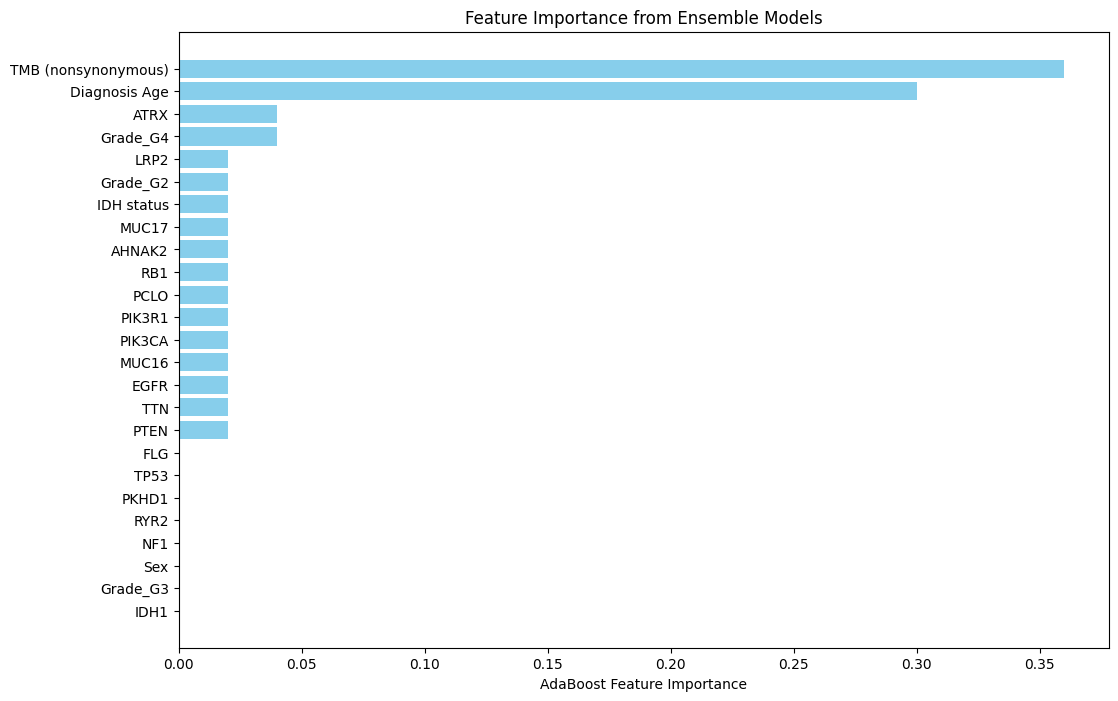

                Feature  AdaBoost Importance  SVM Coefficient  \
24  TMB (nonsynonymous)                 0.36              0.0   
23        Diagnosis Age                 0.30              0.0   
2                  ATRX                 0.04              0.0   
22             Grade_G4                 0.04              0.0   
14                 LRP2                 0.02              0.0   
20             Grade_G2                 0.02              0.0   
18           IDH status                 0.02              0.0   
17                MUC17                 0.02              0.0   
16               AHNAK2                 0.02              0.0   
15                  RB1                 0.02              0.0   
12                 PCLO                 0.02              0.0   
10               PIK3R1                 0.02              0.0   
7                PIK3CA                 0.02              0.0   
6                 MUC16                 0.02              0.0   
5                  EGFR  

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define features and target
X = prediction[features_for_model]  # Use selected features, excluding Patient ID
y = prediction['Overall Survival Status']

# Check for missing values in features and target
if X.isnull().any().any():
    print("Missing values found in features.")
if y.isnull().any():
    print("Missing values found in target variable.")

# Initialize the models
ada_model = AdaBoostClassifier(random_state=42)
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
lr_model = LogisticRegression(class_weight='balanced', random_state=42)

# Fit each model to the data
ada_model.fit(X, y)
svm_model.fit(X, y)
lr_model.fit(X, y)

# Extract feature importances
ada_importances = ada_model.feature_importances_

# For SVM, use coefficients
svm_coefficients = svm_model.coef_[0] if hasattr(svm_model, 'coef_') else np.zeros(X.shape[1])

# Logistic Regression coefficients
lr_coefficients = lr_model.coef_[0]

# Check lengths before combining into a DataFrame
print("Length of final_selected_features:", len(features_for_model))
print("Length of AdaBoost importances:", len(ada_importances))
print("Length of SVM coefficients:", len(svm_coefficients))
print("Length of Logistic Regression coefficients:", len(lr_coefficients))

# Ensure lengths match
if (len(features_for_model) == len(ada_importances) and
    len(features_for_model) == len(svm_coefficients) and
    len(features_for_model) == len(lr_coefficients)):

    # Combine the importances into a DataFrame
    importance_df = pd.DataFrame({
        'Feature': features_for_model,
        'AdaBoost Importance': ada_importances,
        'SVM Coefficient': svm_coefficients,
        'Logistic Regression Coefficient': lr_coefficients
    })

    # Sort by AdaBoost importance
    importance_df = importance_df.sort_values(by='AdaBoost Importance', ascending=False)

    # Plot feature importances
    plt.figure(figsize=(12, 8))
    plt.barh(importance_df['Feature'], importance_df['AdaBoost Importance'], color='skyblue')
    plt.xlabel('AdaBoost Feature Importance')
    plt.title('Feature Importance from Ensemble Models')
    plt.gca().invert_yaxis()  # To display the highest importance at the top
    plt.show()

    # Display the feature importances DataFrame
    print(importance_df)
else:
    print("Lengths do not match; cannot create DataFrame.")
